### Feature Analysis

/local/home/demircis/DRIVE/mt-sinan-demirci/plotting_util.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(sharex=sharex, sharey=sharey, constrained_layout=constrained_layout)


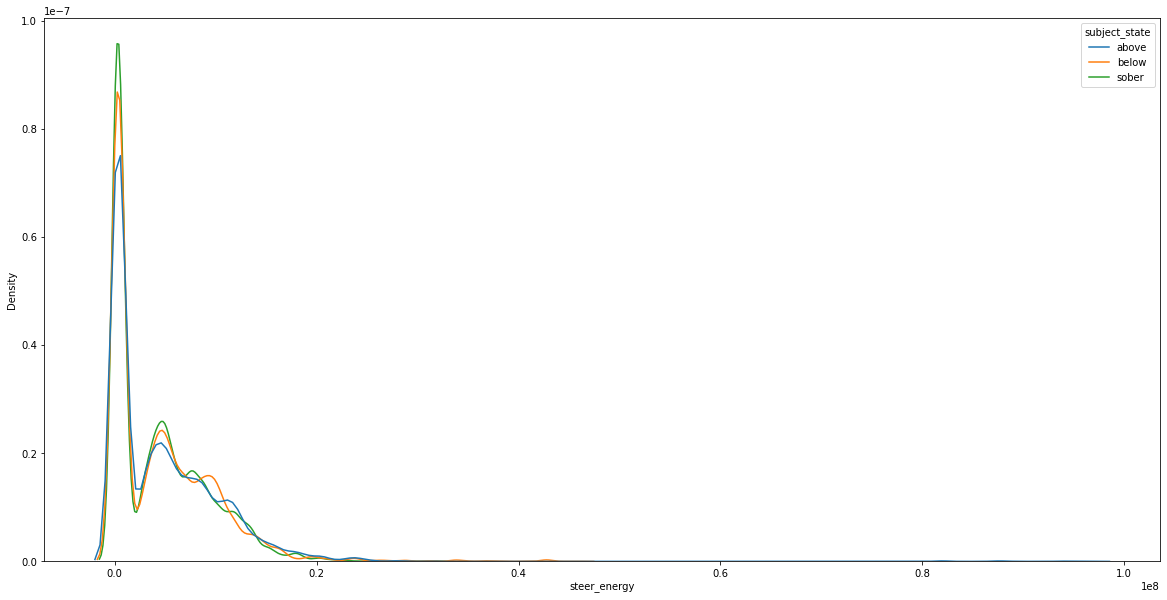

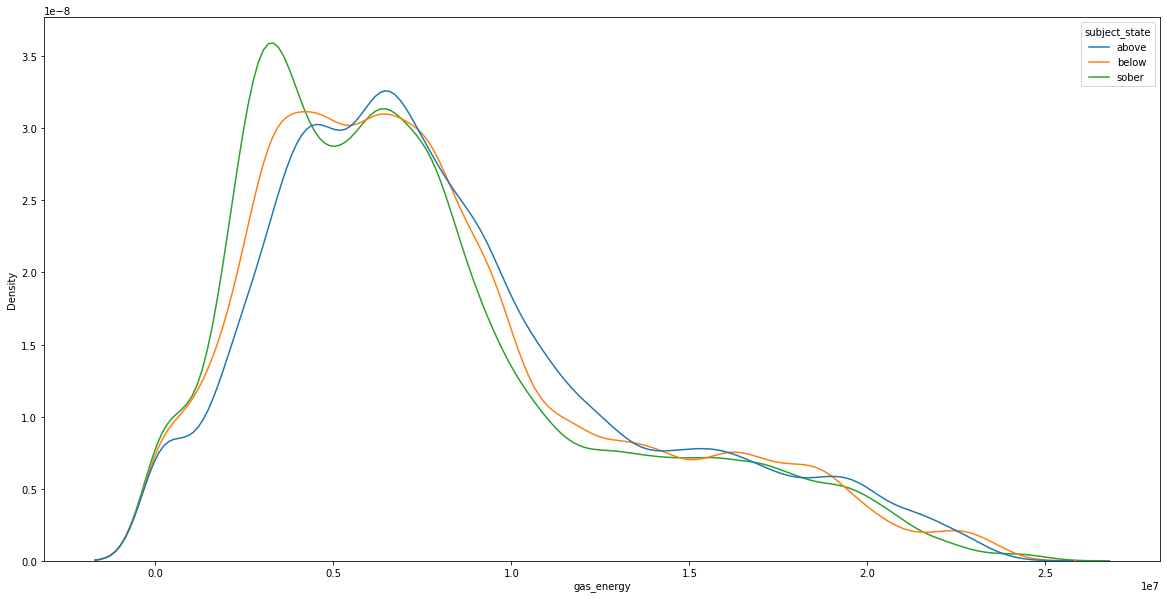

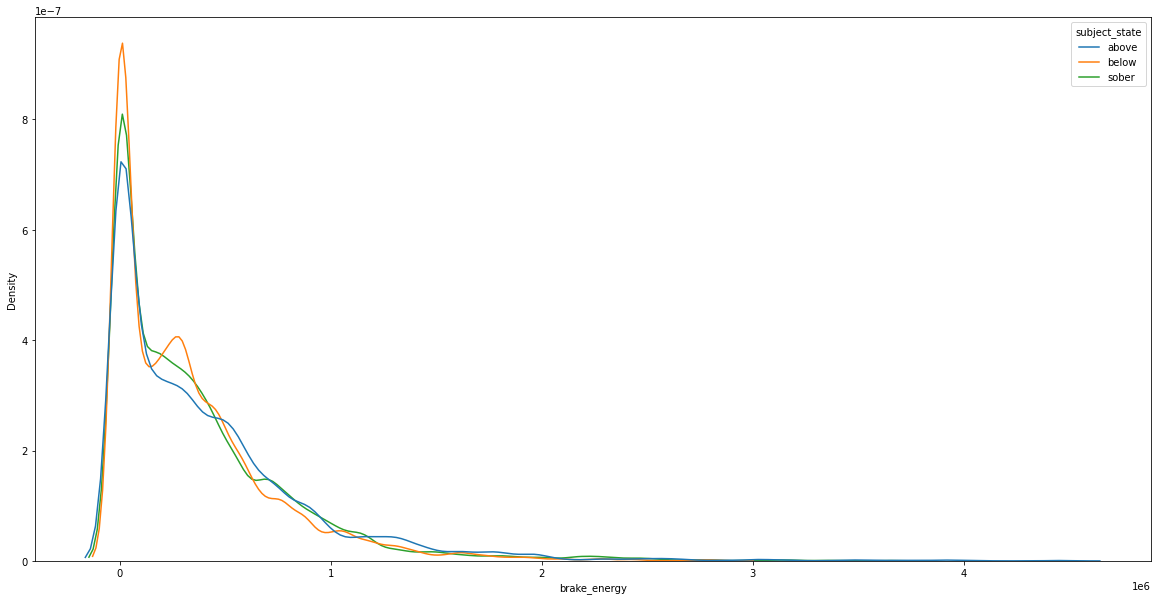

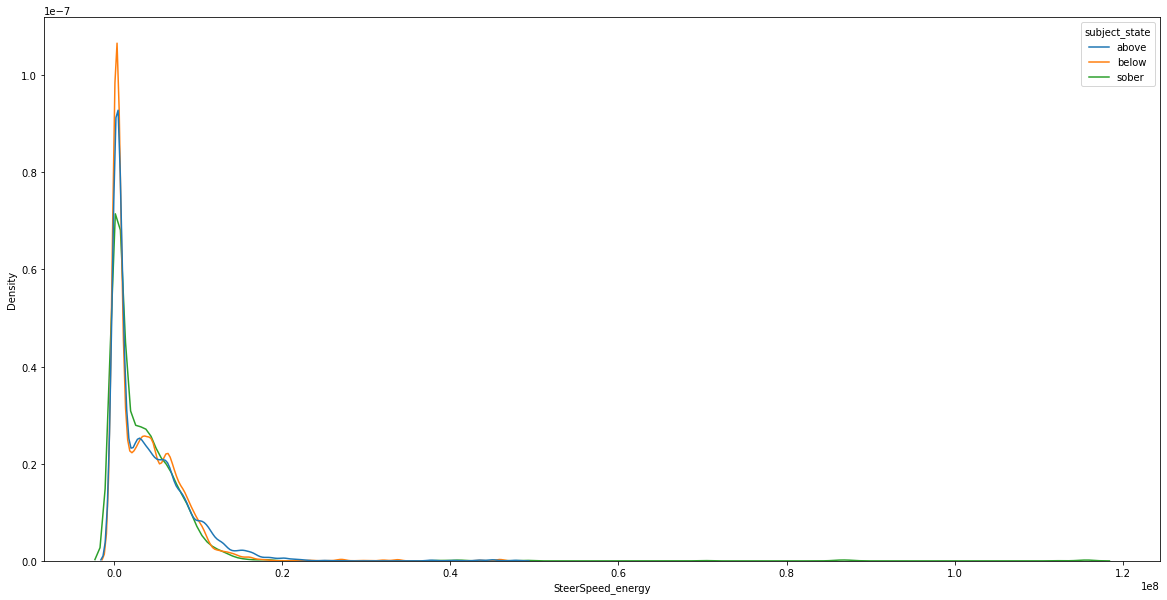

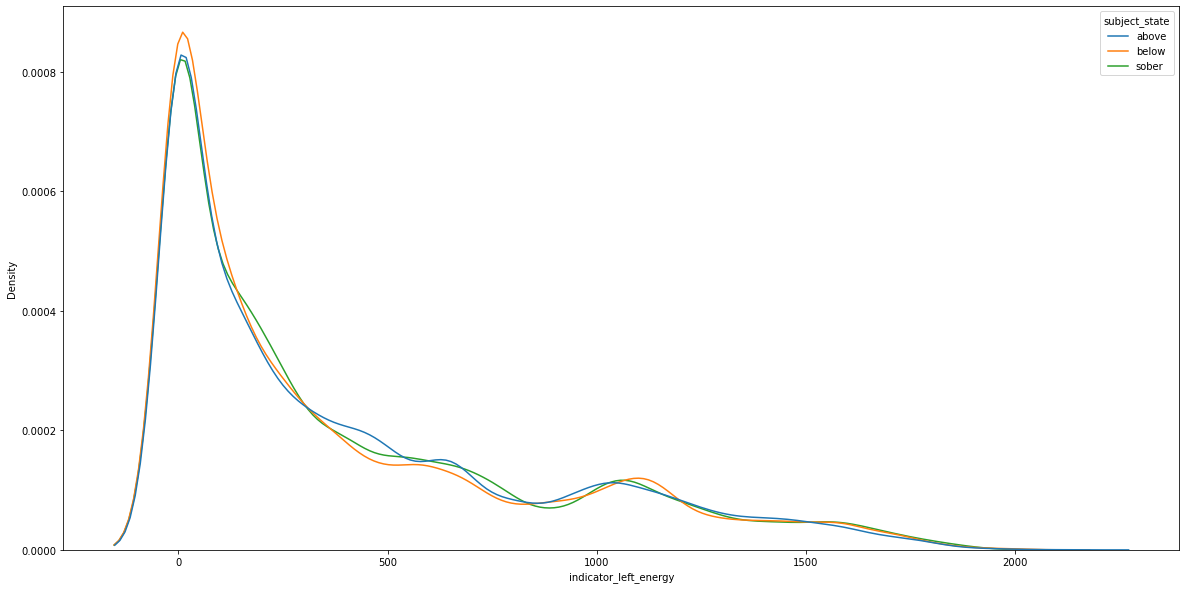

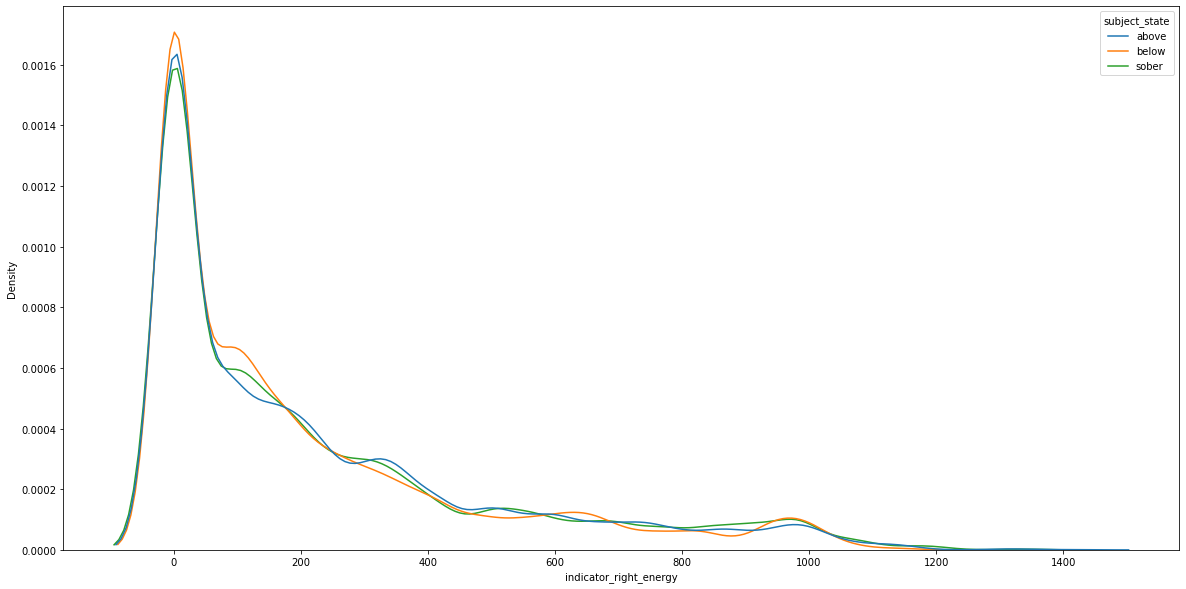

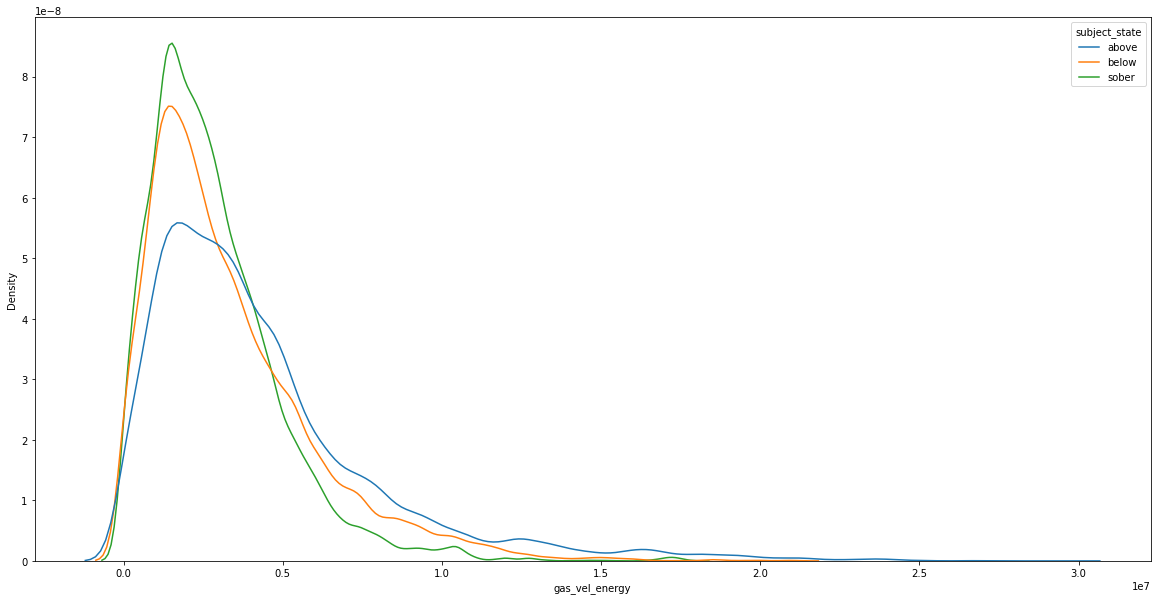

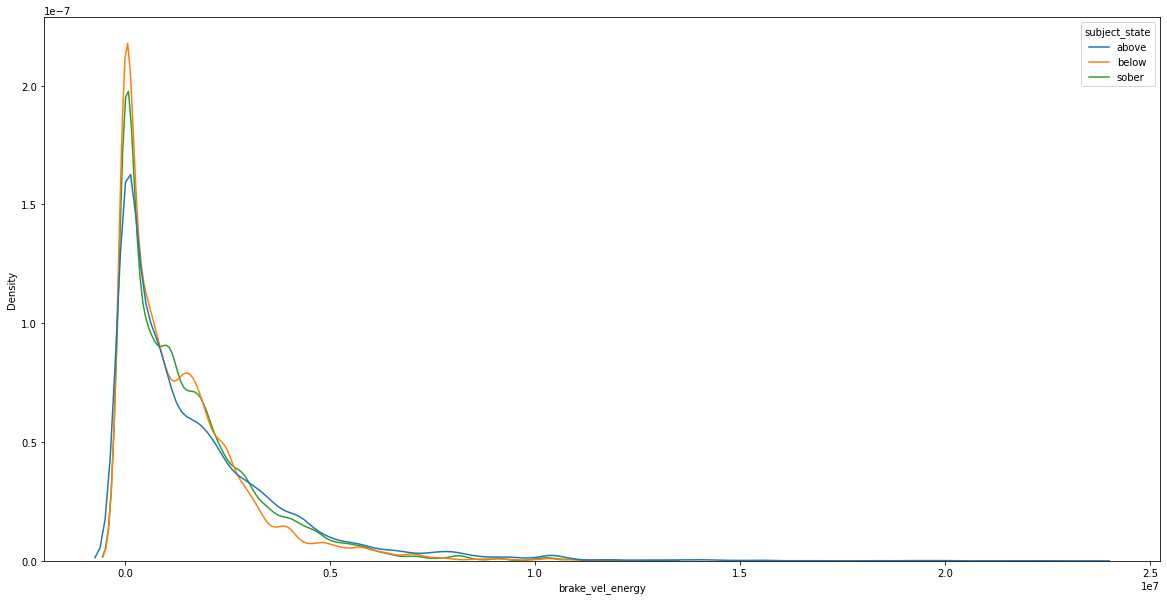

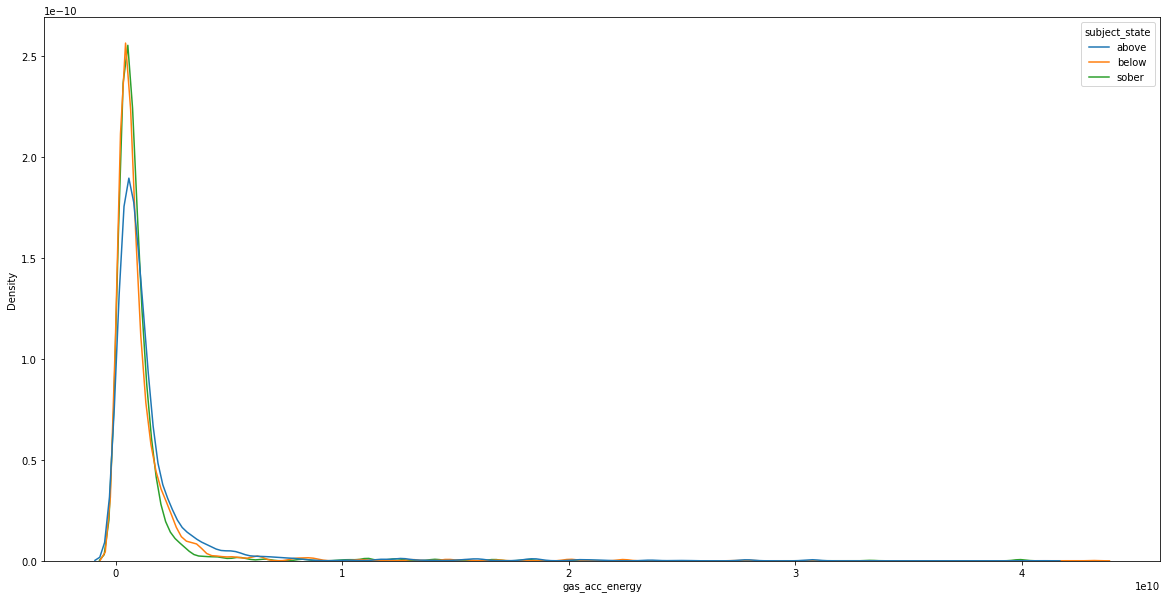

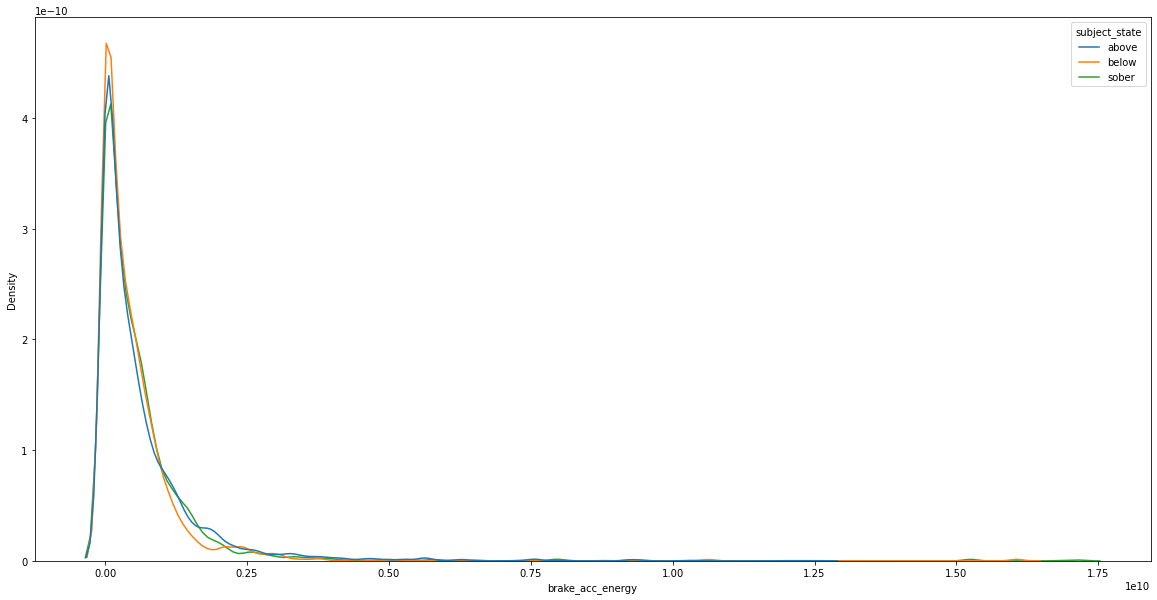

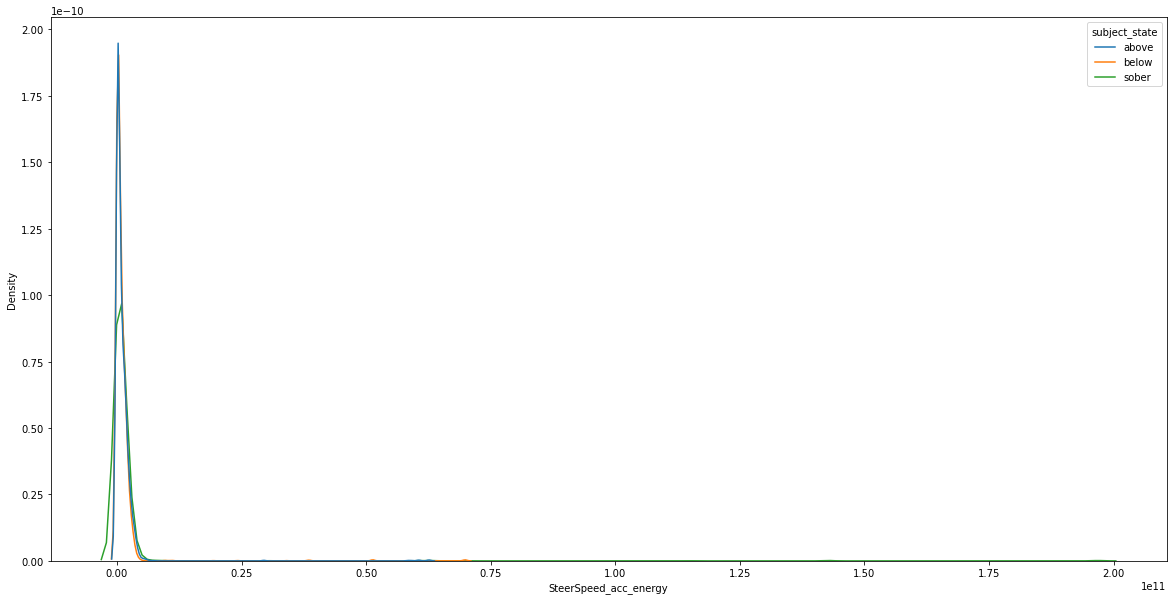

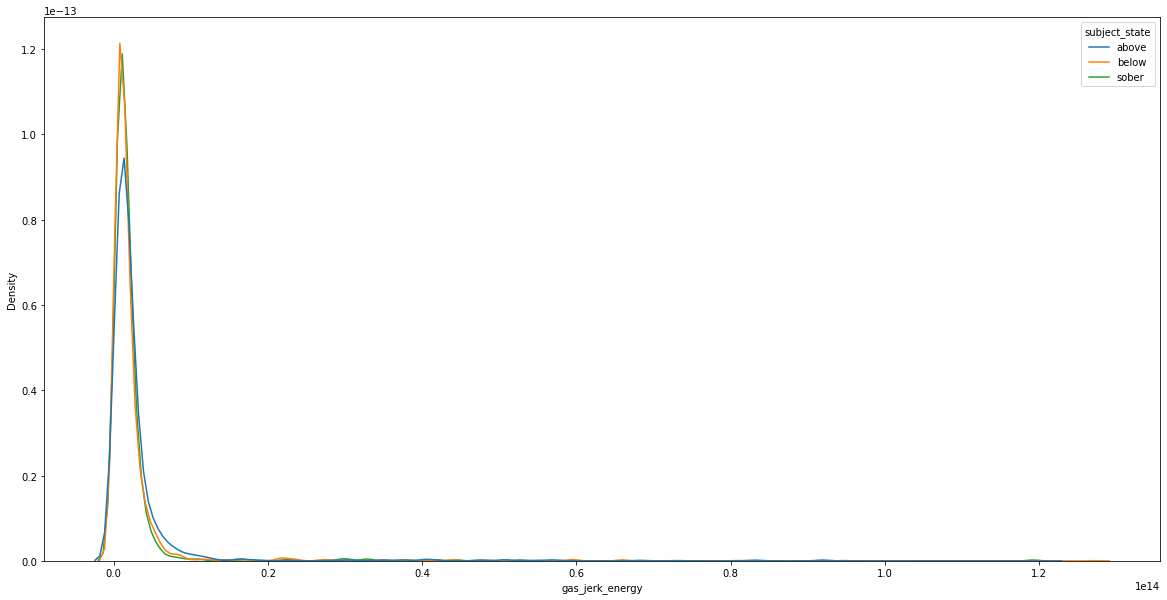

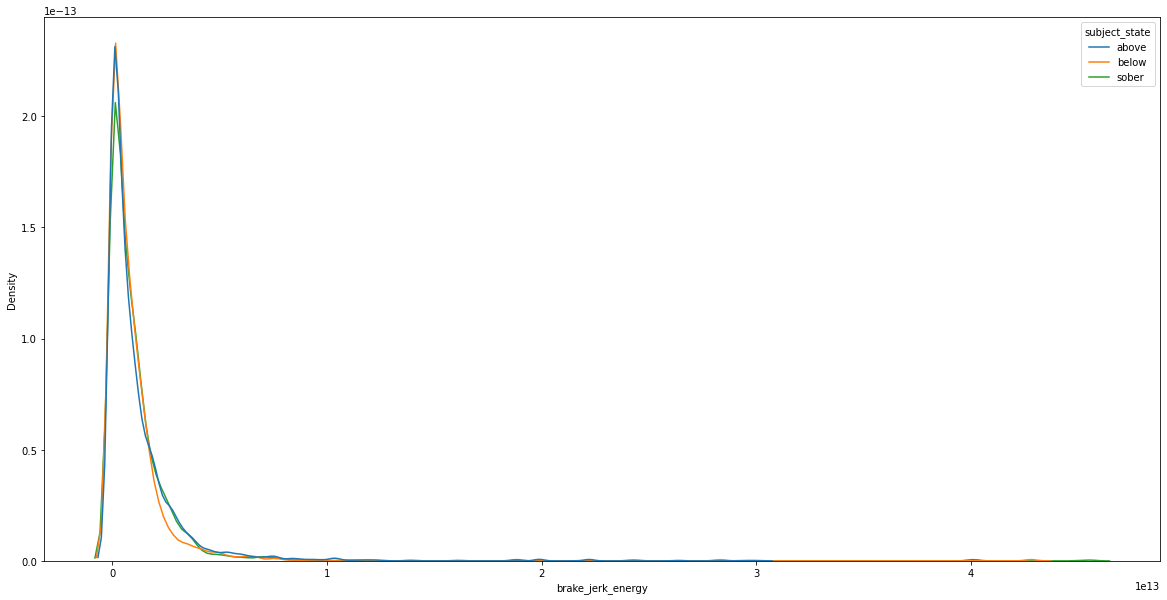

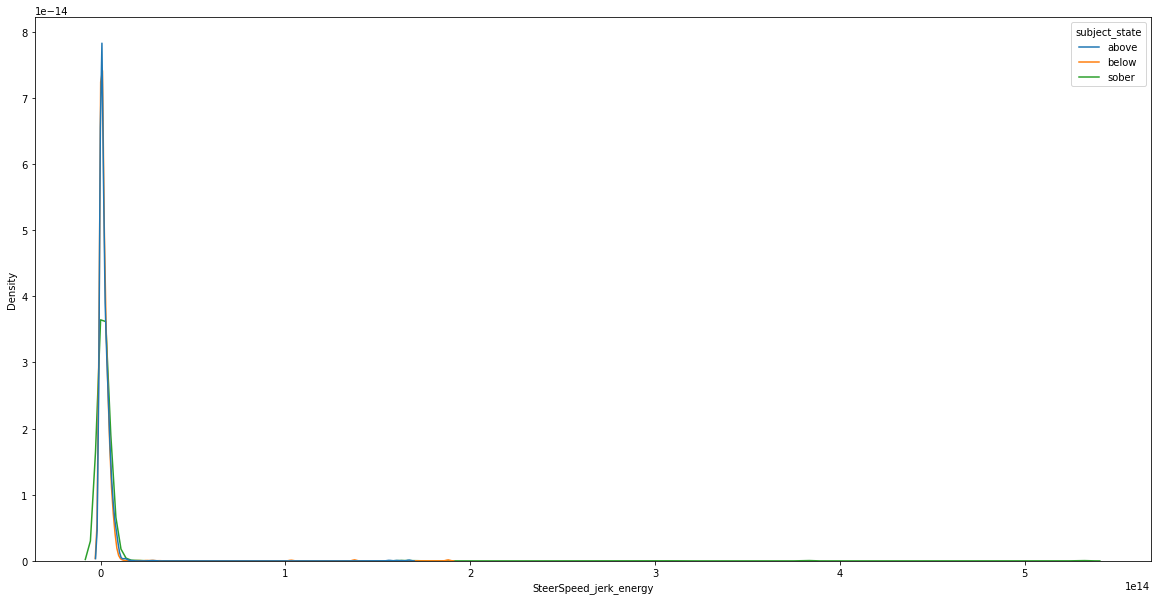

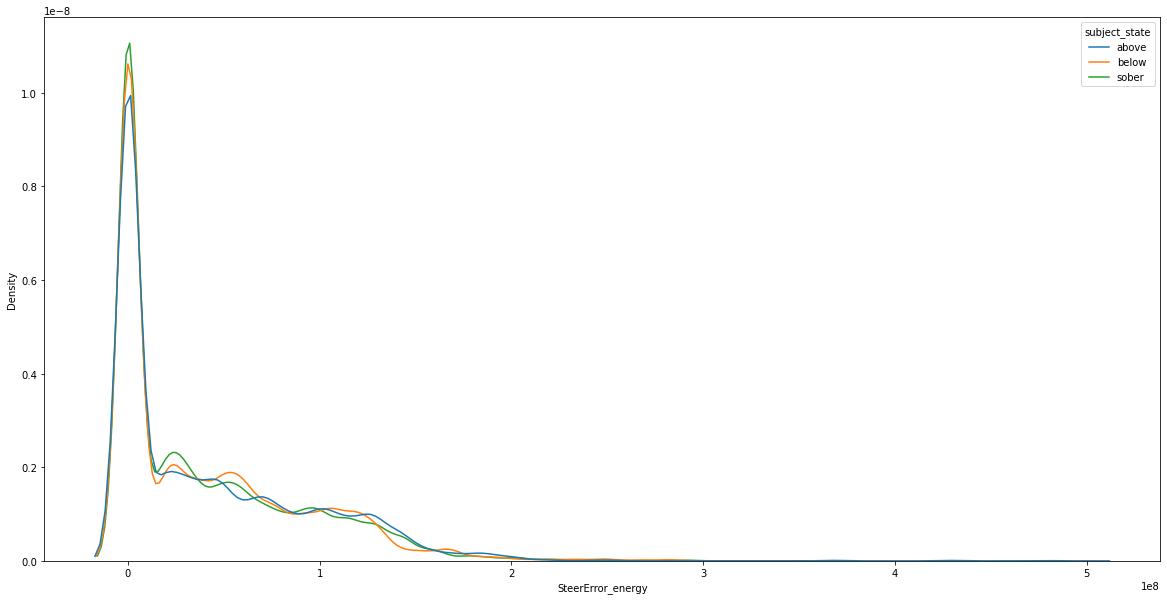

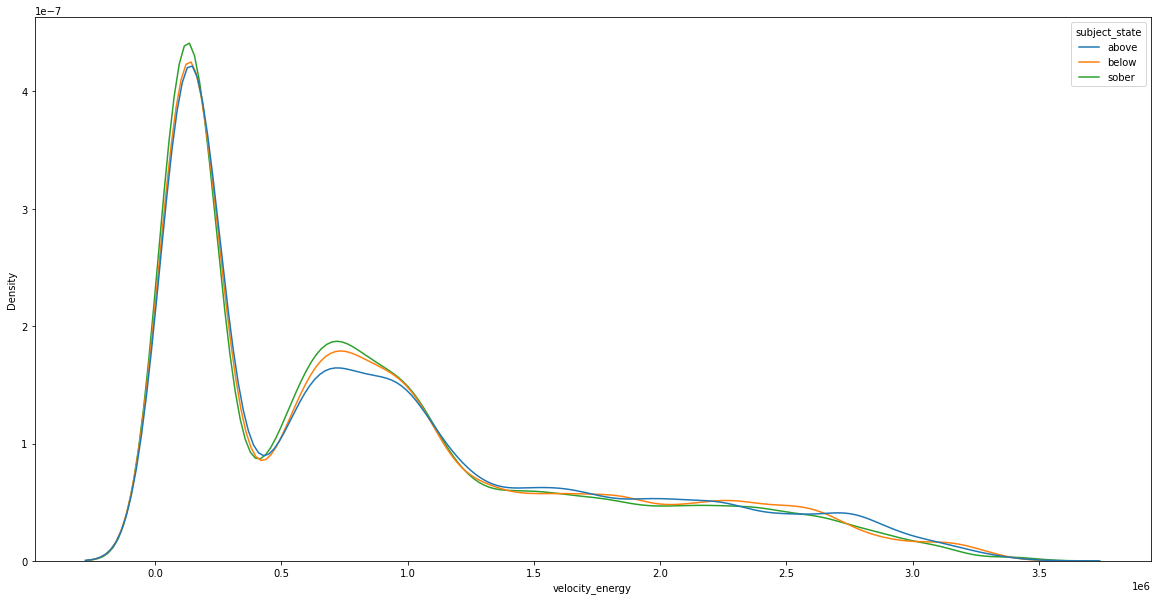

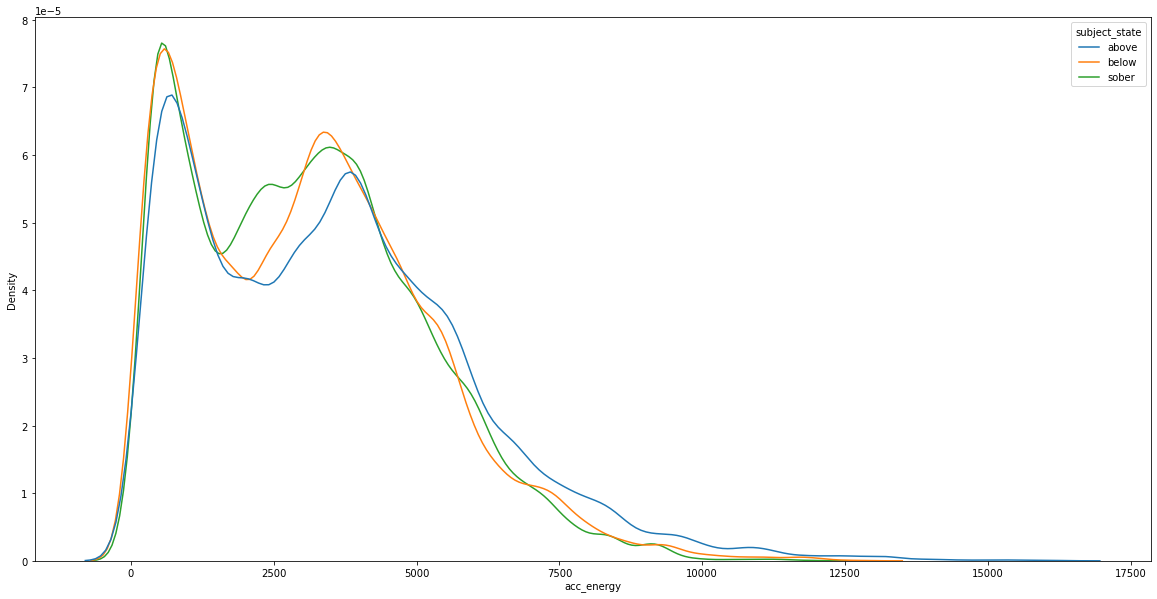

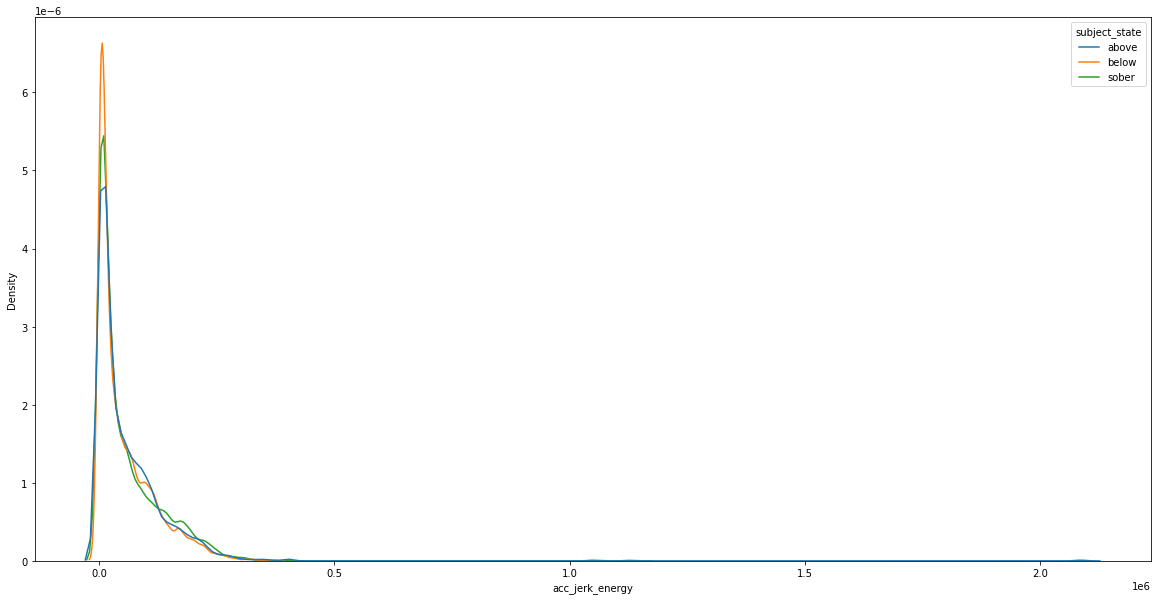

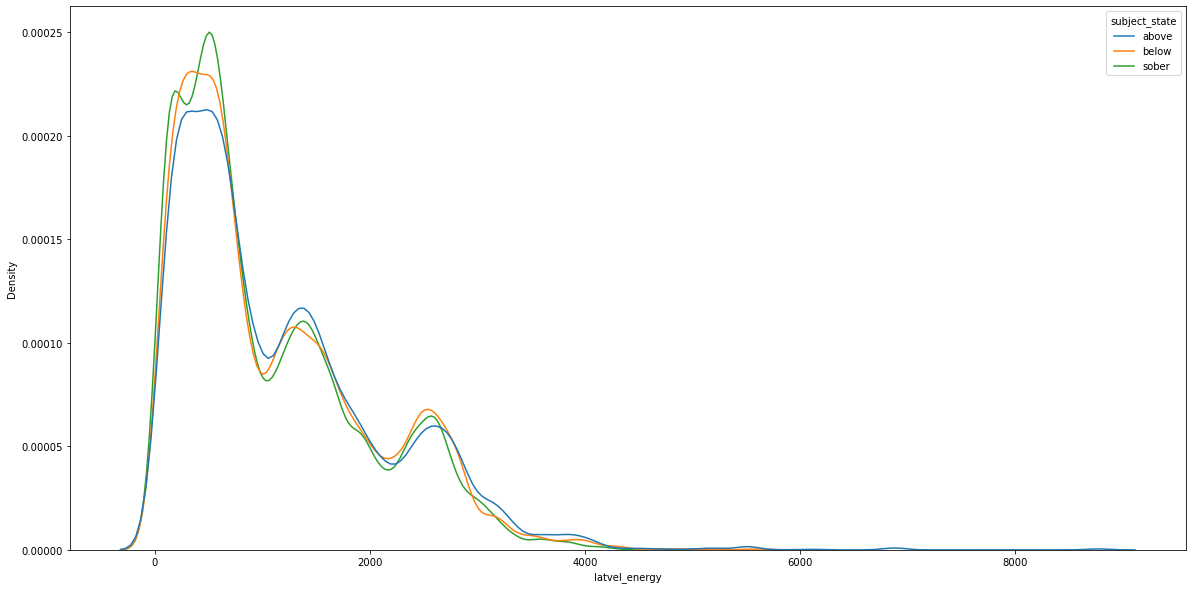

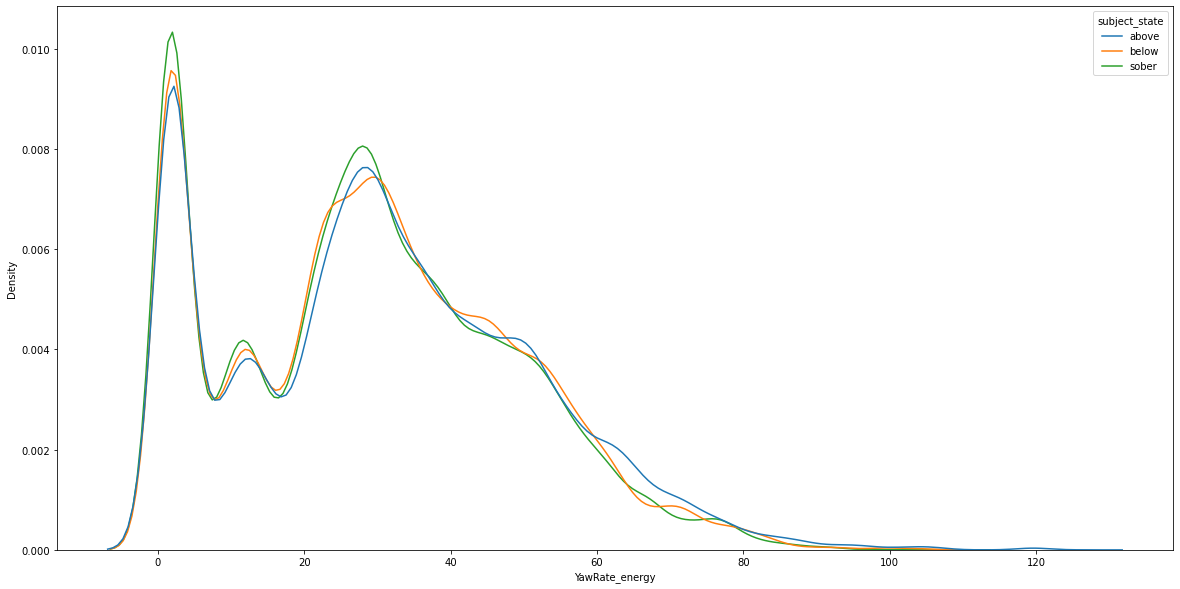

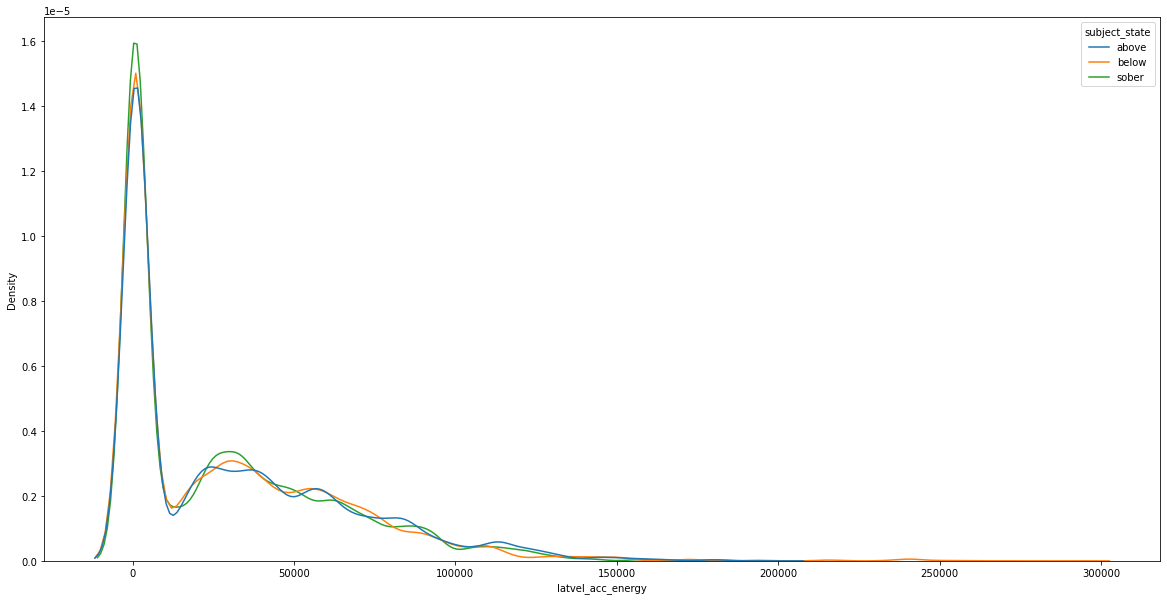

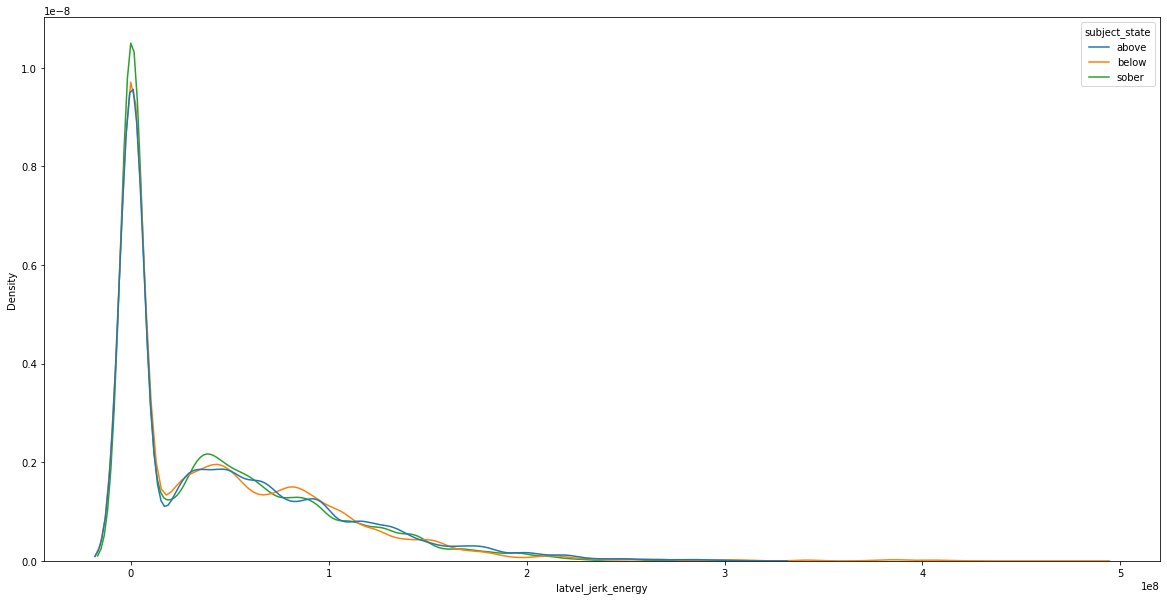

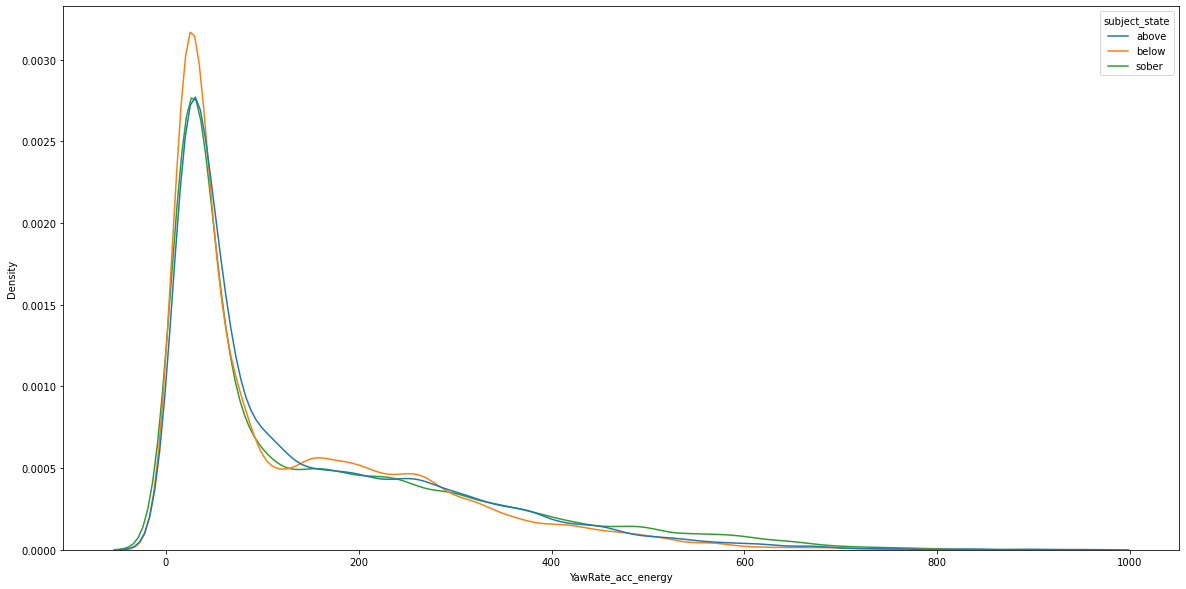

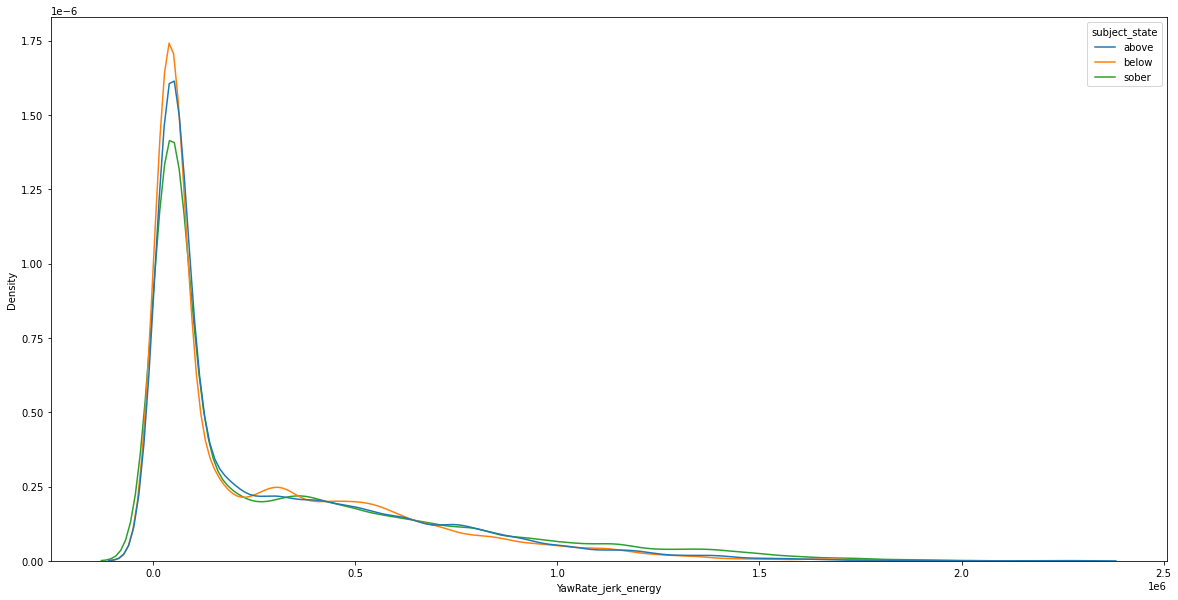

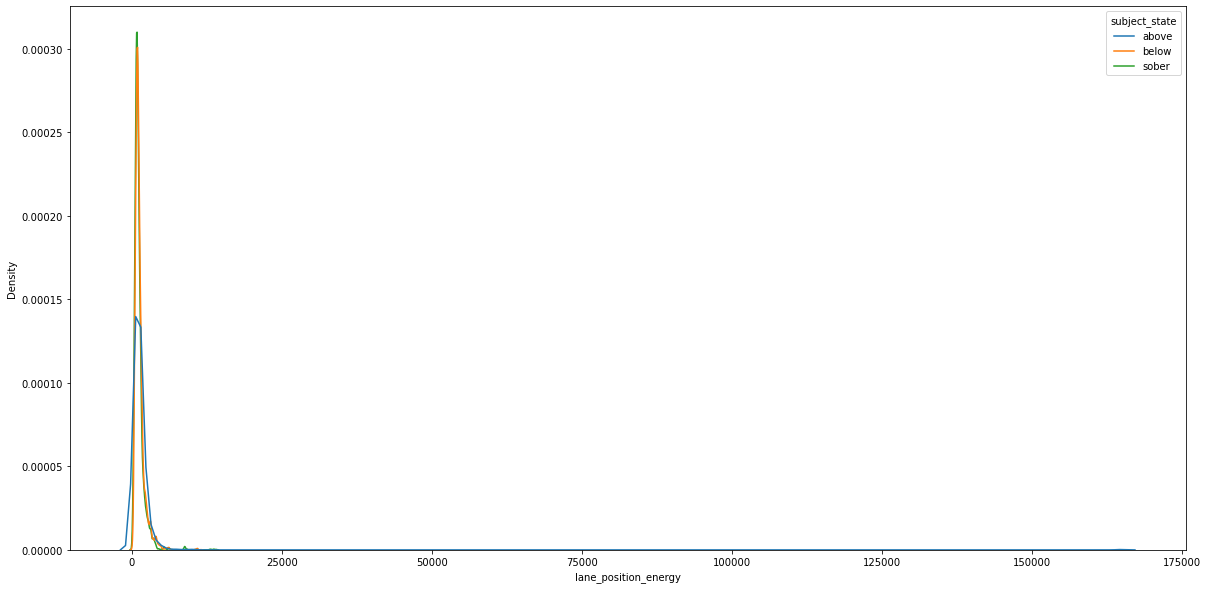

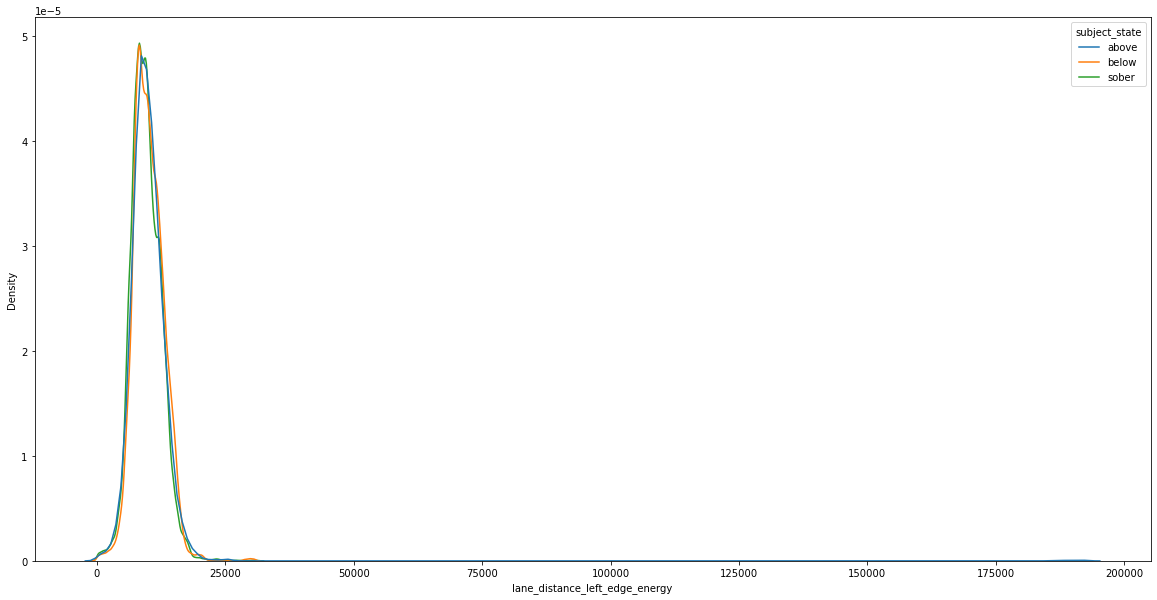

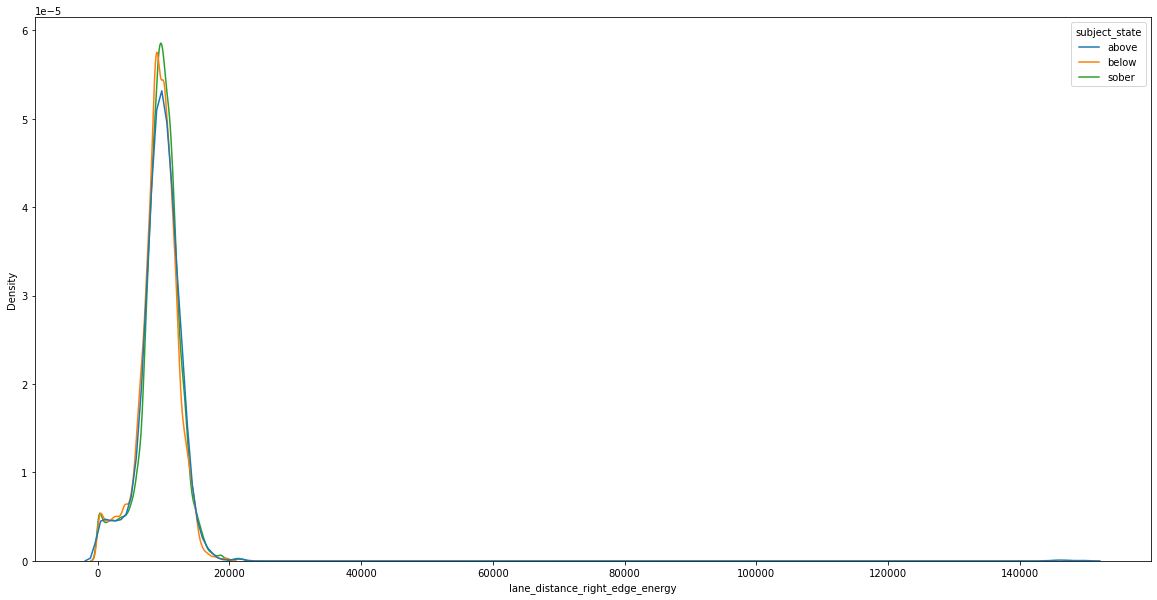

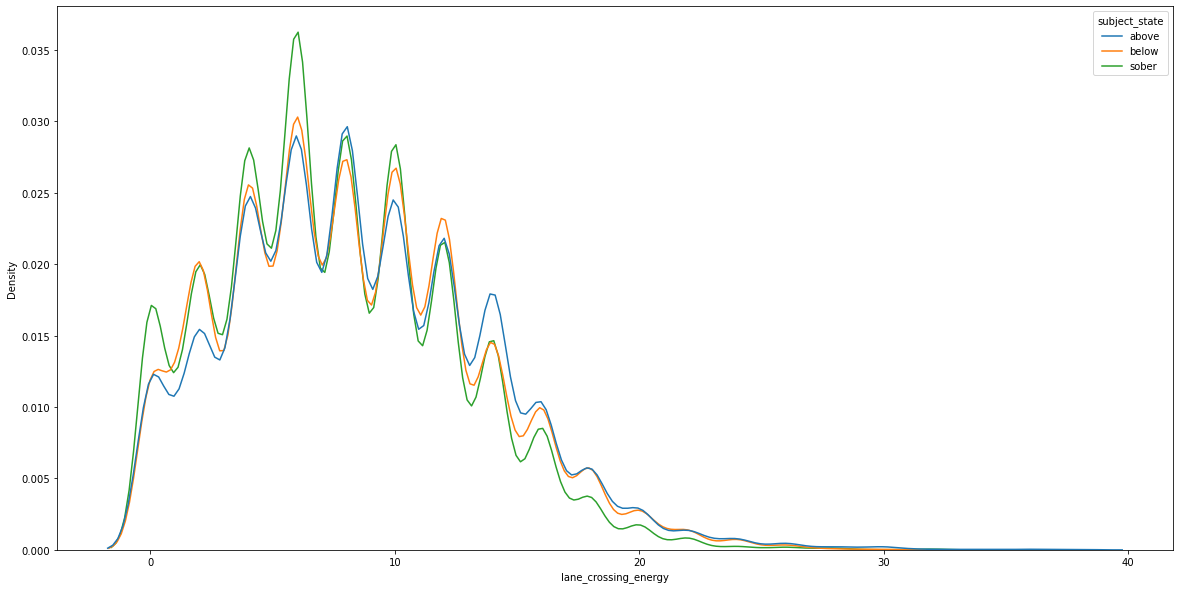

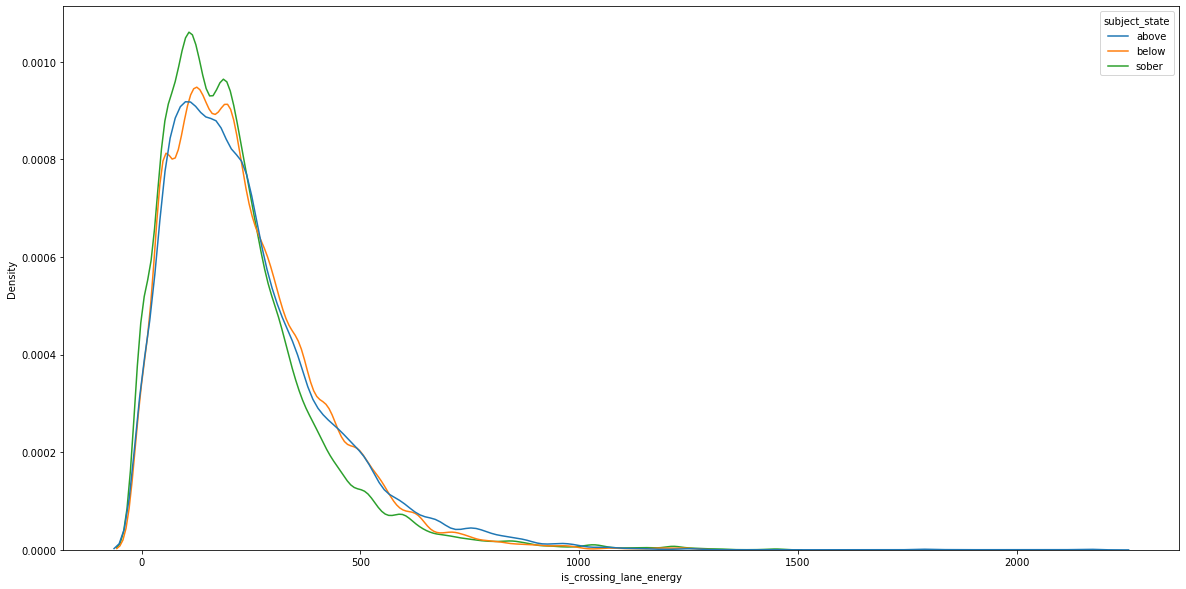

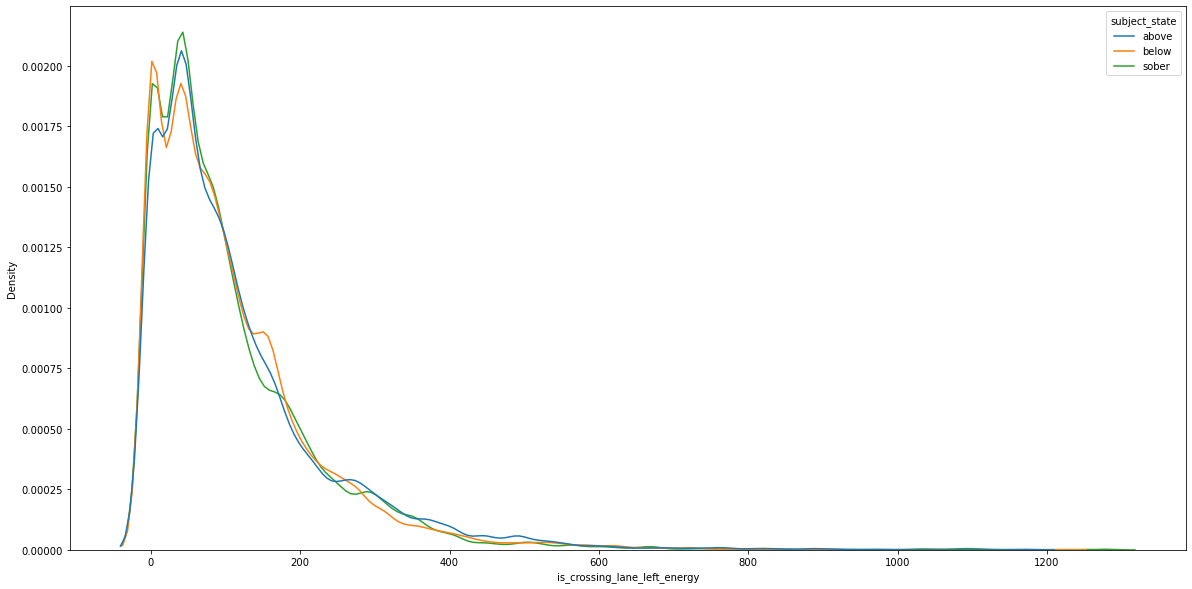

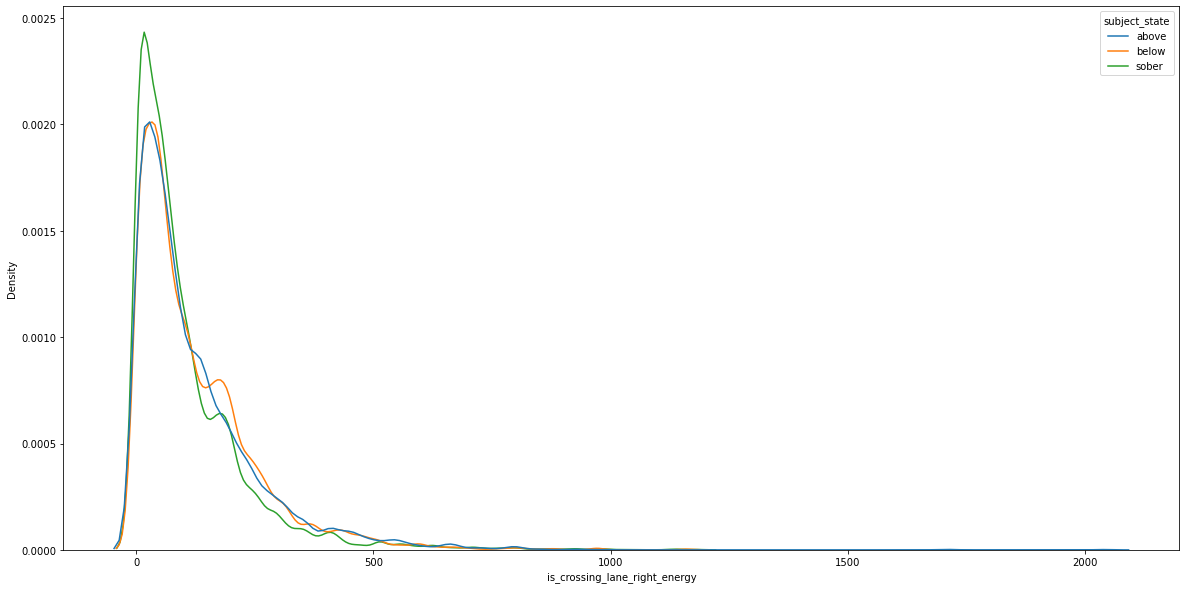

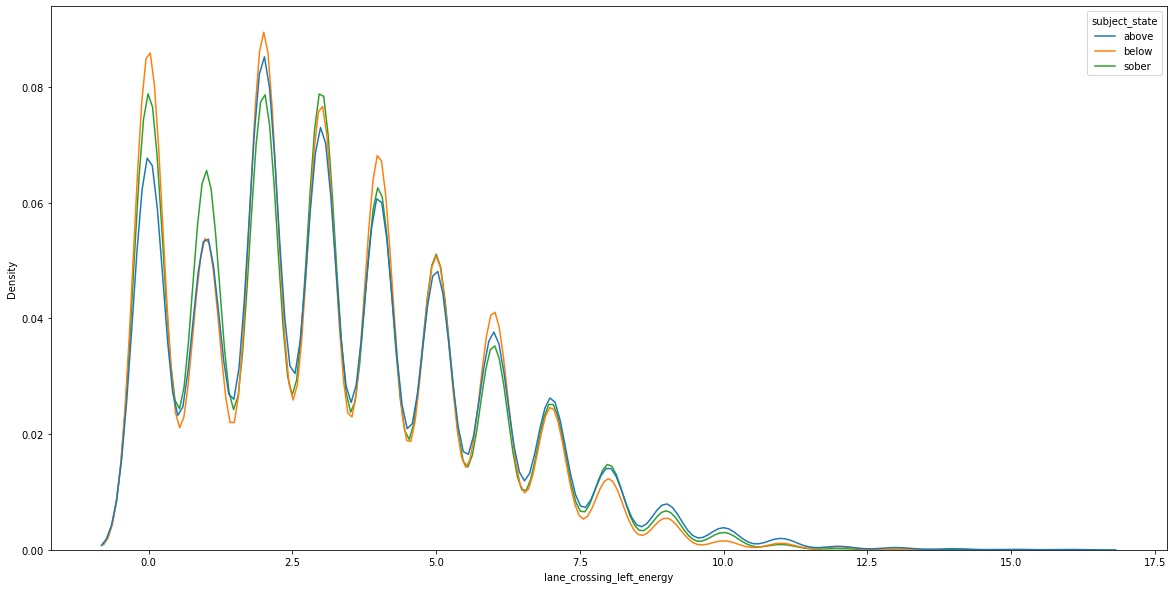

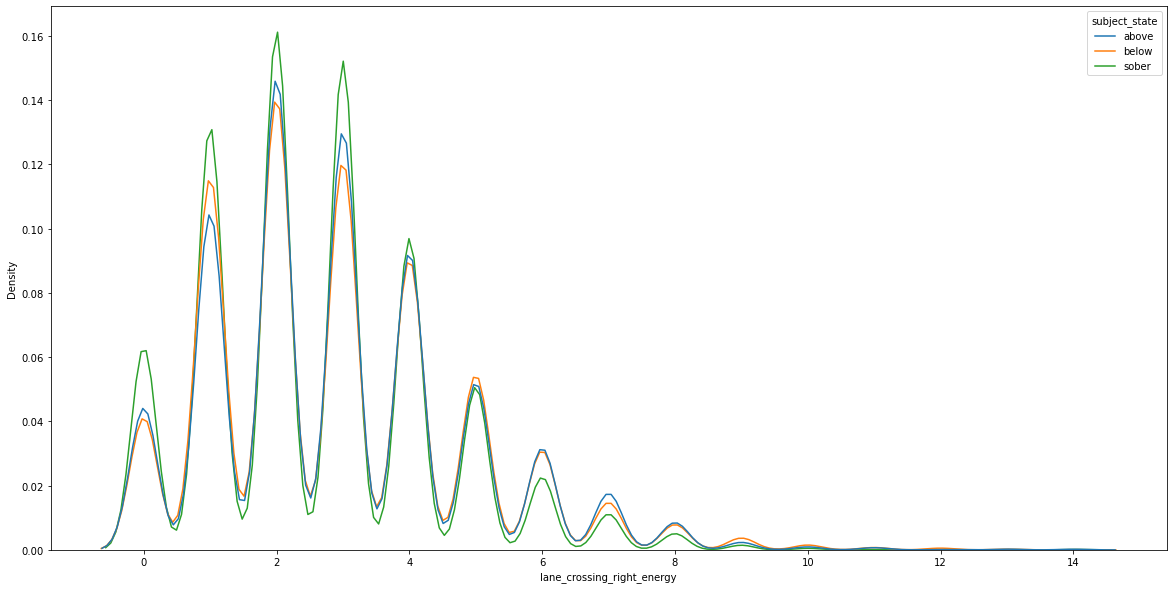

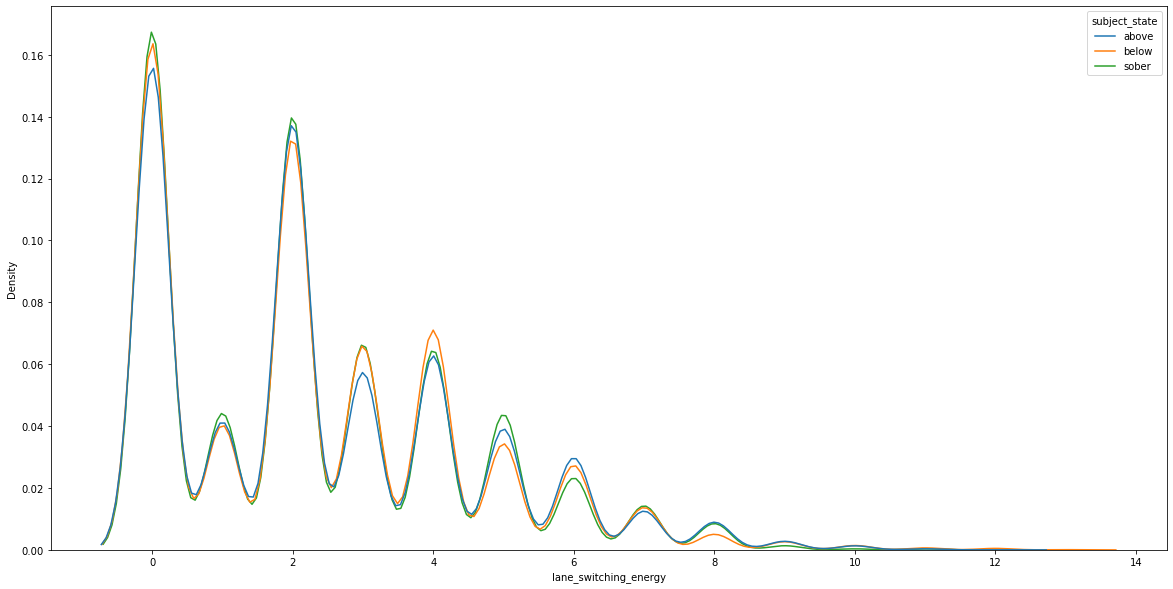

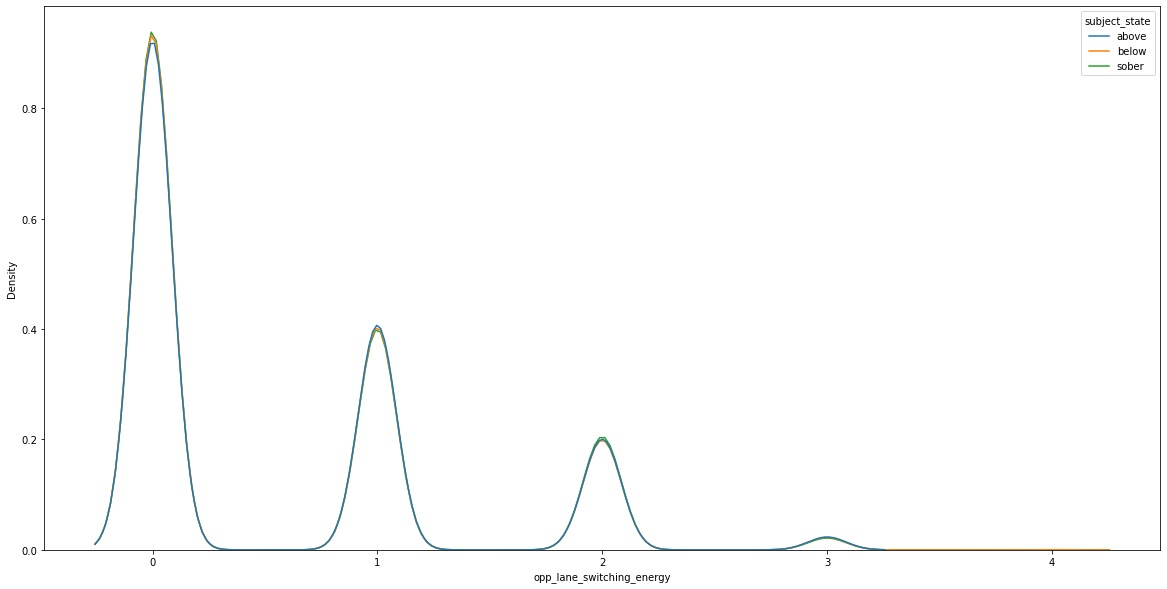

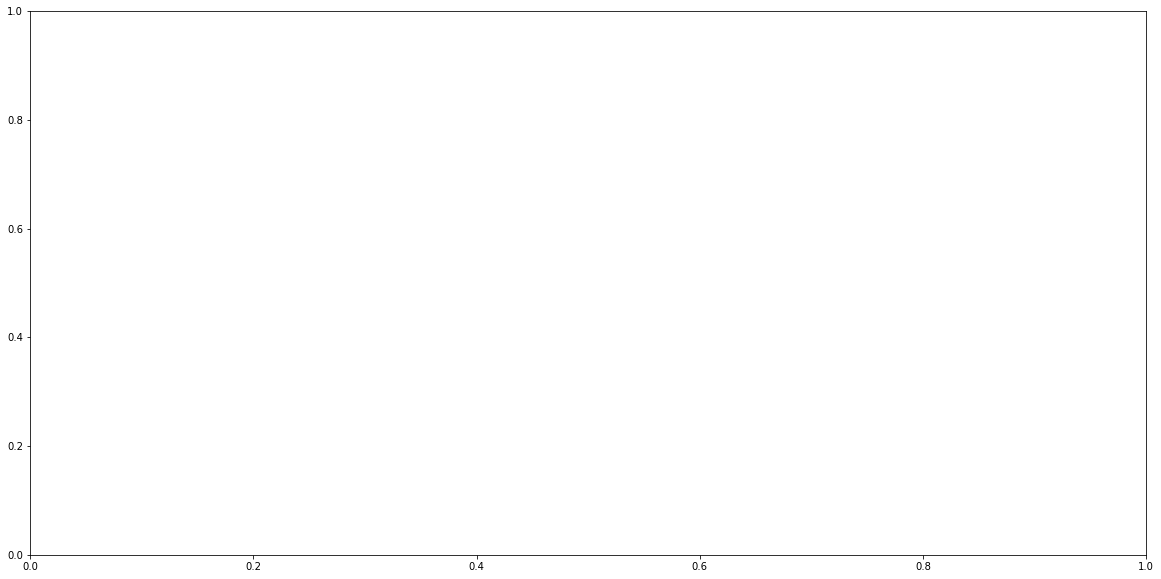

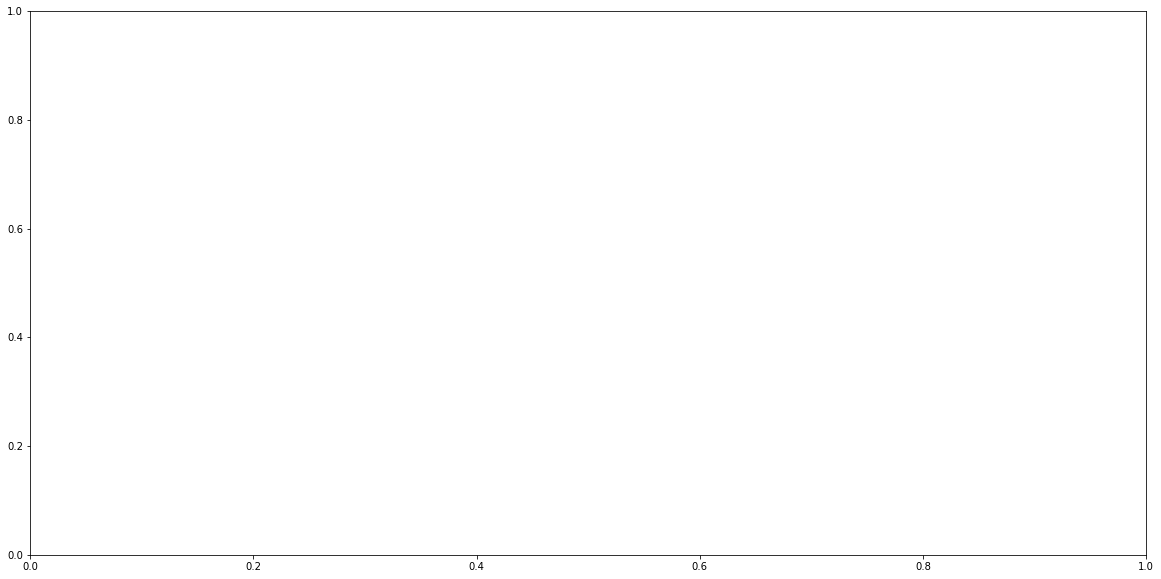

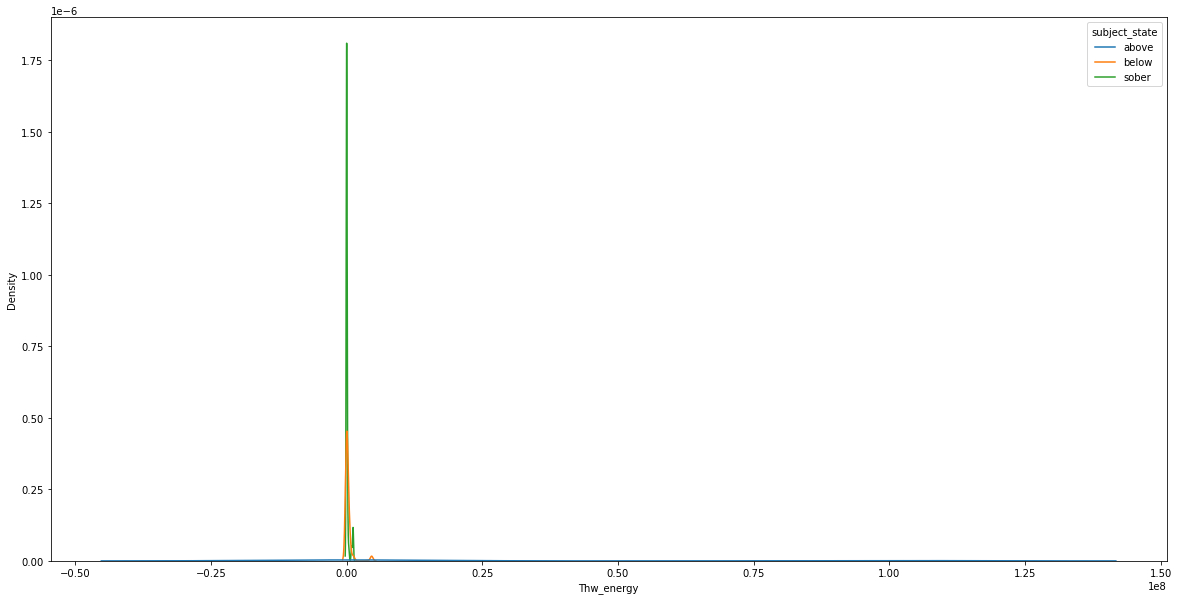

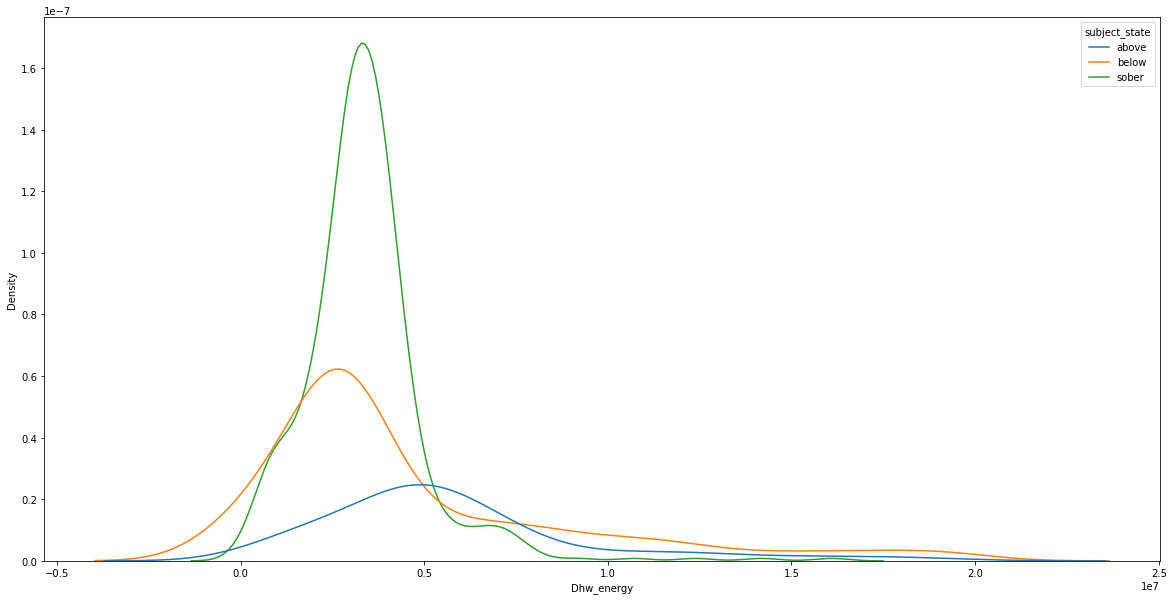

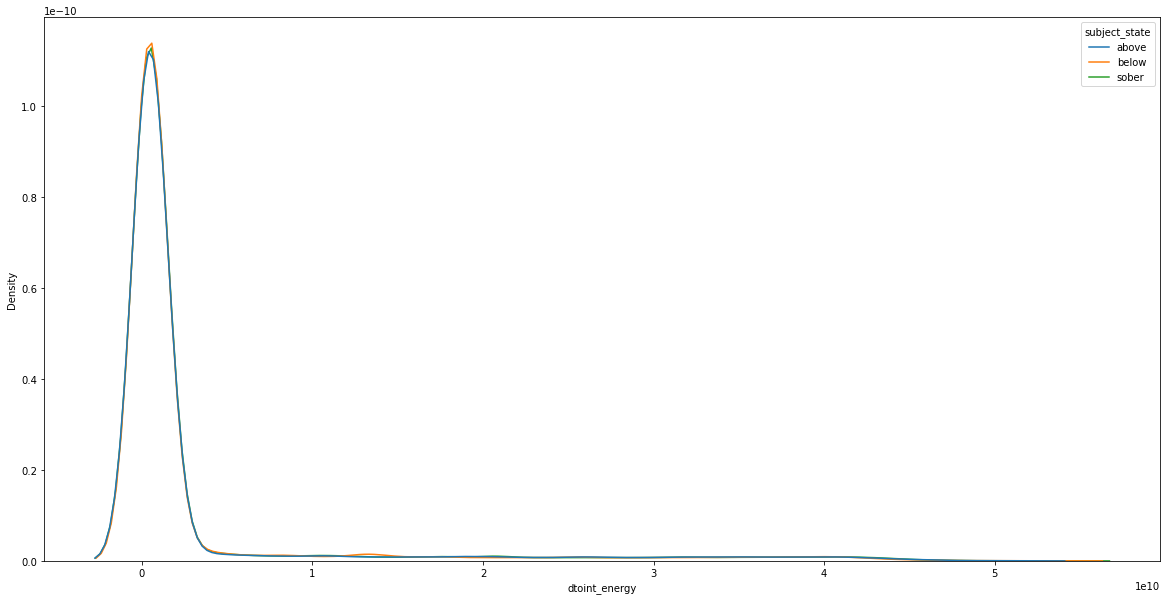

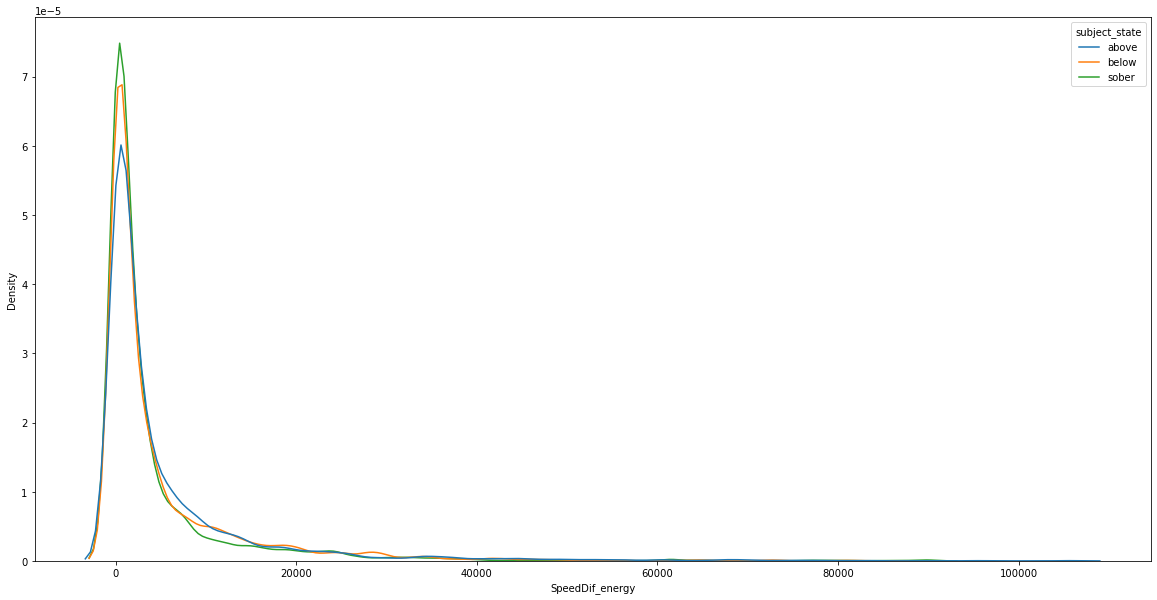

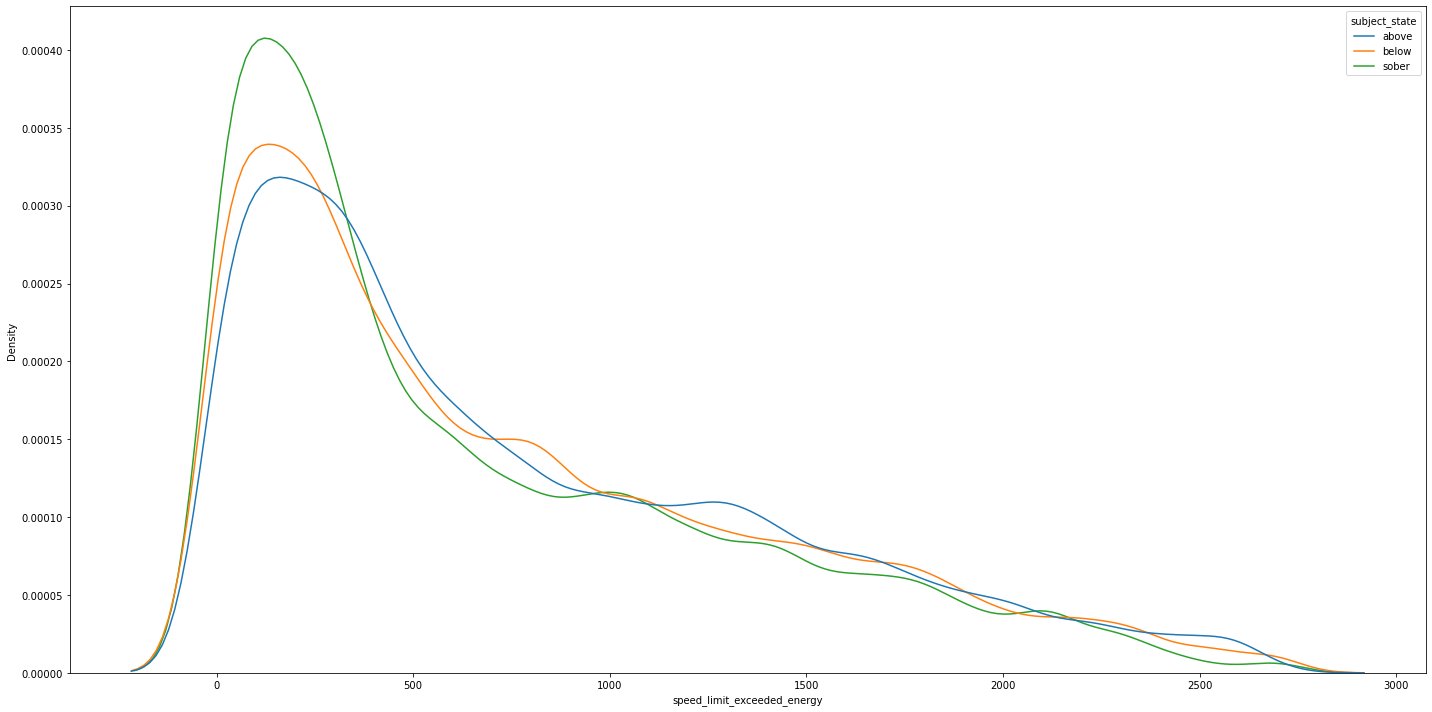

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotting_util as putil

DRIVER_BEHAVIOR = ['steer', 'gas', 'brake', 'SteerSpeed', 'indicator_left', 'indicator_right',
                    'gas_vel', 'brake_vel', 'gas_acc', 'brake_acc', 'SteerSpeed_acc',
                    'gas_jerk', 'brake_jerk', 'SteerSpeed_jerk', 'SteerError']
VEHICLE_BEHAVIOR = ['velocity', 'acc', 'acc_jerk', 'latvel', 'YawRate', 'latvel_acc', 'latvel_jerk',
                    'YawRate_acc', 'YawRate_jerk']
RADAR = ['lane_position', 'lane_distance_left_edge', 'lane_distance_right_edge', 'lane_crossing', 
         'is_crossing_lane', 'is_crossing_lane_left', 'is_crossing_lane_right',
         'lane_crossing_left', 'lane_crossing_right', 'lane_switching', 'opp_lane_switching',
         'Ttc', 'TtcOpp', 'Thw', 'Dhw']
NAVI = ['dtoint', 'SpeedDif', 'speed_limit_exceeded']

SIGNALS = {'driver_behavior': DRIVER_BEHAVIOR,
           'vehicle_behavior': VEHICLE_BEHAVIOR,
           'radar': RADAR,
           'navi': NAVI}

STATS = ['energy']#['mean', 'std', 'min', 'max', 'ptp', 'sum', 'energy', 'skewness',
        #'rms', 'lineintegral', 'n_above_mean', 'n_below_mean', 'n_sign_changes', 'iqr', 'iqr_5_95',
        #'pct_5', 'pct_95']

for signal_type, signals in SIGNALS.items():
    can_data = pd.read_parquet('out/can_data_features_{}_windowsize_90s.parquet'.format(signal_type))
    for signal in signals:
        fig, axes = putil.create_plot()
        putil.set_figure_size(fig, 20, 10)
        for i, stat in enumerate(STATS):
            sns.kdeplot(x=signal + '_' + stat, data=can_data, hue='subject_state', ax=axes[i])
plt.tight_layout()